# NYC Weather

In [24]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

import os
try:
    if run_once == False:
        pass
    else:
        print("os.chdir('..') already run once -- will not run again")
except:
    run_once = True
    os.chdir("..")


os.chdir('..') already run once -- will not run again


In [9]:
df = pd.read_csv('data/weather/nyc_weather_cleaned3.csv')

In [13]:
df = pd.read_csv('data/weather/nyc_weather.csv')
df.head()

,dt,dt_iso,timezone,city_name,lat,lon,temp,visibility,dew_point,feels_like,temp_min,temp_max,pressure,sea_level,grnd_level,humidity,wind_speed,wind_deg,wind_gust,rain_1h,rain_3h,snow_1h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,1356998400,2013-01-01 00:00:00 +0000 UTC,-18000,Custom location,40.726379,-73.942286,3.06,10000.0,-6.10,-2.60,2.71,3.25,1015,NaN,NaN,48,8.74,230,12.85,NaN,NaN,NaN,NaN,100,804,Clouds,overcast clouds,04n
1,1357002000,2013-01-01 01:00:00 +0000 UTC,-18000,Custom location,40.726379,-73.942286,3.07,10000.0,-6.10,-1.84,3.01,3.93,1014,NaN,NaN,48,6.68,240,11.82,NaN,NaN,NaN,NaN,100,804,Clouds,overcast clouds,04n
2,1357005600,2013-01-01 02:00:00 +0000 UTC,-18000,Custom location,40.726379,-73.942286,3.07,10000.0,-6.10,-1.84,3.01,3.93,1014,NaN,NaN,48,6.68,240,9.77,NaN,NaN,NaN,NaN,100,804,Clouds,overcast clouds,04n
3,1357009200,2013-01-01 03:00:00 +0000 UTC,-18000,Custom location,40.726379,-73.942286,3.38,10000.0,-6.08,-1.83,3.15,4.35,1013,NaN,NaN,47,7.71,240,12.85,NaN,NaN,NaN,NaN,100,804,Clouds,overcast clouds,04n
4,1357012800,2013-01-01 04:00:00 +0000 UTC,-18000,Custom location,40.726379,-73.942286,3.38,10000.0,-5.13,-2.01,3.15,4.35,1013,NaN,NaN,51,8.22,250,12.85,NaN,NaN,NaN,NaN,100,804,Clouds,overcast clouds,04n


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118356 entries, 0 to 118355
Data columns (total 28 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   dt                   118356 non-null  int64  
 1   dt_iso               118356 non-null  object 
 2   timezone             118356 non-null  int64  
 3   city_name            118356 non-null  object 
 4   lat                  118356 non-null  float64
 5   lon                  118356 non-null  float64
 6   temp                 118356 non-null  float64
 7   visibility           117474 non-null  float64
 8   dew_point            118356 non-null  float64
 9   feels_like           118356 non-null  float64
 10  temp_min             118356 non-null  float64
 11  temp_max             118356 non-null  float64
 12  pressure             118356 non-null  int64  
 13  sea_level            0 non-null       float64
 14  grnd_level           0 non-null       float64
 15  humidity         

In [15]:
# Let's drop the timezone, city_name, lat, lon, sea_level, grnd_level, weather_icon columns
df = df.drop(columns=['timezone', 'city_name', 'lat', 'lon', 'sea_level', 'grnd_level', 'weather_icon'])

In [16]:
df.head()

,dt,dt_iso,temp,visibility,dew_point,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,wind_gust,rain_1h,rain_3h,snow_1h,snow_3h,clouds_all,weather_id,weather_main,weather_description
0,1356998400,2013-01-01 00:00:00 +0000 UTC,3.06,10000.0,-6.10,-2.60,2.71,3.25,1015,48,8.74,230,12.85,NaN,NaN,NaN,NaN,100,804,Clouds,overcast clouds
1,1357002000,2013-01-01 01:00:00 +0000 UTC,3.07,10000.0,-6.10,-1.84,3.01,3.93,1014,48,6.68,240,11.82,NaN,NaN,NaN,NaN,100,804,Clouds,overcast clouds
2,1357005600,2013-01-01 02:00:00 +0000 UTC,3.07,10000.0,-6.10,-1.84,3.01,3.93,1014,48,6.68,240,9.77,NaN,NaN,NaN,NaN,100,804,Clouds,overcast clouds
3,1357009200,2013-01-01 03:00:00 +0000 UTC,3.38,10000.0,-6.08,-1.83,3.15,4.35,1013,47,7.71,240,12.85,NaN,NaN,NaN,NaN,100,804,Clouds,overcast clouds
4,1357012800,2013-01-01 04:00:00 +0000 UTC,3.38,10000.0,-5.13,-2.01,3.15,4.35,1013,51,8.22,250,12.85,NaN,NaN,NaN,NaN,100,804,Clouds,overcast clouds


In [17]:
# We can convert the NaN values in the rain and snow columns to 0
rain_snow_columns = ["rain_1h", "rain_3h", "snow_1h", "snow_3h"]

df[rain_snow_columns] = df[rain_snow_columns].fillna(0)
df.head()

,dt,dt_iso,temp,visibility,dew_point,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,wind_gust,rain_1h,rain_3h,snow_1h,snow_3h,clouds_all,weather_id,weather_main,weather_description
0,1356998400,2013-01-01 00:00:00 +0000 UTC,3.06,10000.0,-6.10,-2.60,2.71,3.25,1015,48,8.74,230,12.85,0.0,0.0,0.0,0.0,100,804,Clouds,overcast clouds
1,1357002000,2013-01-01 01:00:00 +0000 UTC,3.07,10000.0,-6.10,-1.84,3.01,3.93,1014,48,6.68,240,11.82,0.0,0.0,0.0,0.0,100,804,Clouds,overcast clouds
2,1357005600,2013-01-01 02:00:00 +0000 UTC,3.07,10000.0,-6.10,-1.84,3.01,3.93,1014,48,6.68,240,9.77,0.0,0.0,0.0,0.0,100,804,Clouds,overcast clouds
3,1357009200,2013-01-01 03:00:00 +0000 UTC,3.38,10000.0,-6.08,-1.83,3.15,4.35,1013,47,7.71,240,12.85,0.0,0.0,0.0,0.0,100,804,Clouds,overcast clouds
4,1357012800,2013-01-01 04:00:00 +0000 UTC,3.38,10000.0,-5.13,-2.01,3.15,4.35,1013,51,8.22,250,12.85,0.0,0.0,0.0,0.0,100,804,Clouds,overcast clouds


In [18]:
df['visibility'].describe()

count    117474.000000
mean       9225.910908
std        2038.172182
min         201.000000
25%       10000.000000
50%       10000.000000
75%       10000.000000
max       10000.000000
Name: visibility, dtype: float64

We can observe that visibility is heavily skewed, as most days have 10k+ meters of visibility.

We can filter out the 10000 visibility days to analyze its distribution

In [19]:
df[df['visibility'] < 10000]['visibility'].describe()

count    20120.000000
mean      5480.350795
std       2706.698774
min        201.000000
25%       3219.000000
50%       4828.000000
75%       8047.000000
max       9656.000000
Name: visibility, dtype: float64

<Axes: ylabel='visibility'>

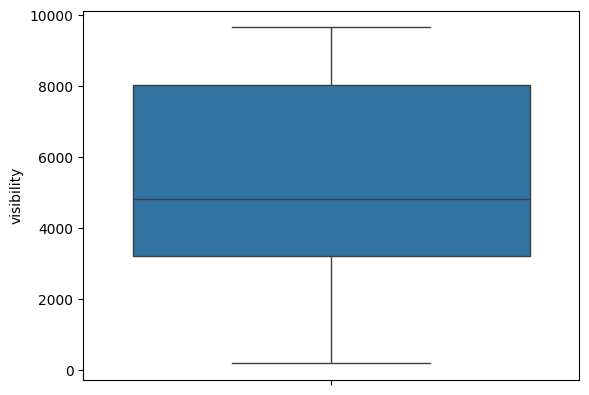

In [20]:
sns.boxplot(df[df['visibility'] < 10000]['visibility'])

In [21]:
nan_visibility_indices = df[df['visibility'].isna()].index

In [22]:
df[df['visibility'].isna()]
# We can likely extrapolate the visibility values from nearby time points with non-null visibility values.
df['visibility'] = df['visibility'].ffill(axis=0).bfill(axis=0)

In [23]:
interpolated_visibility = df['visibility'][nan_visibility_indices]
interpolated_visibility.describe()

count      882.000000
mean      9384.622449
std       1964.723287
min        402.000000
25%      10000.000000
50%      10000.000000
75%      10000.000000
max      10000.000000
Name: visibility, dtype: float64

In [24]:
interpolated_visibility[interpolated_visibility < 10000].describe()

count     127.000000
mean     5726.275591
std      3351.339348
min       402.000000
25%      2012.000000
50%      8000.000000
75%      8000.000000
max      9656.000000
Name: visibility, dtype: float64

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118356 entries, 0 to 118355
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   dt                   118356 non-null  int64  
 1   dt_iso               118356 non-null  object 
 2   temp                 118356 non-null  float64
 3   visibility           118356 non-null  float64
 4   dew_point            118356 non-null  float64
 5   feels_like           118356 non-null  float64
 6   temp_min             118356 non-null  float64
 7   temp_max             118356 non-null  float64
 8   pressure             118356 non-null  int64  
 9   humidity             118356 non-null  int64  
 10  wind_speed           118356 non-null  float64
 11  wind_deg             118356 non-null  int64  
 12  wind_gust            43010 non-null   float64
 13  rain_1h              118356 non-null  float64
 14  rain_3h              118356 non-null  float64
 15  snow_1h          

It looks like we only have NaN wind gusts remaining.

In [26]:
df[df['wind_gust'].notna()]

,dt,dt_iso,temp,visibility,dew_point,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,wind_gust,rain_1h,rain_3h,snow_1h,snow_3h,clouds_all,weather_id,weather_main,weather_description
0,1356998400,2013-01-01 00:00:00 +0000 UTC,3.06,10000.0,-6.10,-2.60,2.71,3.25,1015,48,8.74,230,12.85,0.0,0.0,0.0,0.0,100,804,Clouds,overcast clouds
1,1357002000,2013-01-01 01:00:00 +0000 UTC,3.07,10000.0,-6.10,-1.84,3.01,3.93,1014,48,6.68,240,11.82,0.0,0.0,0.0,0.0,100,804,Clouds,overcast clouds
2,1357005600,2013-01-01 02:00:00 +0000 UTC,3.07,10000.0,-6.10,-1.84,3.01,3.93,1014,48,6.68,240,9.77,0.0,0.0,0.0,0.0,100,804,Clouds,overcast clouds
3,1357009200,2013-01-01 03:00:00 +0000 UTC,3.38,10000.0,-6.08,-1.83,3.15,4.35,1013,47,7.71,240,12.85,0.0,0.0,0.0,0.0,100,804,Clouds,overcast clouds
4,1357012800,2013-01-01 04:00:00 +0000 UTC,3.38,10000.0,-5.13,-2.01,3.15,4.35,1013,51,8.22,250,12.85,0.0,0.0,0.0,0.0,100,804,Clouds,overcast clouds
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118343,1754218800,2025-08-03 11:00:00 +0000 UTC,19.59,10000.0,14.62,19.51,18.15,20.53,1022,73,2.24,52,2.68,0.0,0.0,0.0,0.0,0,800,Clear,sky is clear
118344,1754222400,2025-08-03 12:00:00 +0000 UTC,21.13,10000.0,14.06,20.97,19.93,22.30,1022,64,3.13,55,3.13,0.0,0.0,0.0,0.0,0,800,Clear,sky is clear
118345,1754226000,2025-08-03 13:00:00 +0000 UTC,23.00,10000.0,13.20,22.77,21.60,24.52,1022,54,4.02,46,5.36,0.0,0.0,0.0,0.0,0,800,Clear,sky is clear
118353,1754254800,2025-08-03 21:00:00 +0000 UTC,27.98,10000.0,11.95,27.45,26.60,28.93,1019,37,4.12,150,8.75,0.0,0.0,0.0,0.0,0,711,Smoke,smoke


In [27]:
na_gust_indices = df[df['wind_gust'].isna()].index

In [31]:
# Let's derive the wind gusts from the existing wind speed and wind gust rows
df['gust_ratio'] = df['wind_gust'] / df['wind_speed']
# Since the NaN values in wind_gust are 0, we can set the gust_ratio to NaN where gust_ratio is 0
df.loc[df['gust_ratio'] == 0, 'gust_ratio'] = np.nan
df['gust_ratio'].describe()
gust_ratios = df[df['gust_ratio'].notna()]

In [32]:
# We can take the mean of the gust ratios to fill in the NaN values
mean_gust_ratio = gust_ratios['gust_ratio'].mean()
df['gust_ratio'] = df['gust_ratio'].fillna(mean_gust_ratio)

In [33]:
# Then we can fill the NaN values in wind_gust with the gust_ratio * wind_speed
df['wind_gust'] = df['gust_ratio'] * df['wind_speed']

In [34]:
df = df.drop(columns=['gust_ratio'])

In [35]:
df[['wind_speed', 'wind_gust']].loc[na_gust_indices]

,wind_speed,wind_gust
17,8.22,12.845241
20,4.63,7.235215
22,5.65,8.829150
26,6.17,9.641744
29,7.71,12.048274
...,...,...
118349,3.60,5.625653
118350,3.09,4.828685
118351,4.12,6.438247
118352,4.63,7.235215


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118356 entries, 0 to 118355
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   dt                   118356 non-null  int64  
 1   dt_iso               118356 non-null  object 
 2   temp                 118356 non-null  float64
 3   visibility           118356 non-null  float64
 4   dew_point            118356 non-null  float64
 5   feels_like           118356 non-null  float64
 6   temp_min             118356 non-null  float64
 7   temp_max             118356 non-null  float64
 8   pressure             118356 non-null  int64  
 9   humidity             118356 non-null  int64  
 10  wind_speed           118356 non-null  float64
 11  wind_deg             118356 non-null  int64  
 12  wind_gust            118356 non-null  float64
 13  rain_1h              118356 non-null  float64
 14  rain_3h              118356 non-null  float64
 15  snow_1h          

In [37]:
df.head()

,dt,dt_iso,temp,visibility,dew_point,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,wind_gust,rain_1h,rain_3h,snow_1h,snow_3h,clouds_all,weather_id,weather_main,weather_description
0,1356998400,2013-01-01 00:00:00 +0000 UTC,3.06,10000.0,-6.10,-2.60,2.71,3.25,1015,48,8.74,230,12.85,0.0,0.0,0.0,0.0,100,804,Clouds,overcast clouds
1,1357002000,2013-01-01 01:00:00 +0000 UTC,3.07,10000.0,-6.10,-1.84,3.01,3.93,1014,48,6.68,240,11.82,0.0,0.0,0.0,0.0,100,804,Clouds,overcast clouds
2,1357005600,2013-01-01 02:00:00 +0000 UTC,3.07,10000.0,-6.10,-1.84,3.01,3.93,1014,48,6.68,240,9.77,0.0,0.0,0.0,0.0,100,804,Clouds,overcast clouds
3,1357009200,2013-01-01 03:00:00 +0000 UTC,3.38,10000.0,-6.08,-1.83,3.15,4.35,1013,47,7.71,240,12.85,0.0,0.0,0.0,0.0,100,804,Clouds,overcast clouds
4,1357012800,2013-01-01 04:00:00 +0000 UTC,3.38,10000.0,-5.13,-2.01,3.15,4.35,1013,51,8.22,250,12.85,0.0,0.0,0.0,0.0,100,804,Clouds,overcast clouds


In [38]:
df[df['weather_id'] == 804].head()

,dt,dt_iso,temp,visibility,dew_point,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,wind_gust,rain_1h,rain_3h,snow_1h,snow_3h,clouds_all,weather_id,weather_main,weather_description
0,1356998400,2013-01-01 00:00:00 +0000 UTC,3.06,10000.0,-6.10,-2.60,2.71,3.25,1015,48,8.74,230,12.85,0.0,0.0,0.0,0.0,100,804,Clouds,overcast clouds
1,1357002000,2013-01-01 01:00:00 +0000 UTC,3.07,10000.0,-6.10,-1.84,3.01,3.93,1014,48,6.68,240,11.82,0.0,0.0,0.0,0.0,100,804,Clouds,overcast clouds
2,1357005600,2013-01-01 02:00:00 +0000 UTC,3.07,10000.0,-6.10,-1.84,3.01,3.93,1014,48,6.68,240,9.77,0.0,0.0,0.0,0.0,100,804,Clouds,overcast clouds
3,1357009200,2013-01-01 03:00:00 +0000 UTC,3.38,10000.0,-6.08,-1.83,3.15,4.35,1013,47,7.71,240,12.85,0.0,0.0,0.0,0.0,100,804,Clouds,overcast clouds
4,1357012800,2013-01-01 04:00:00 +0000 UTC,3.38,10000.0,-5.13,-2.01,3.15,4.35,1013,51,8.22,250,12.85,0.0,0.0,0.0,0.0,100,804,Clouds,overcast clouds


In [40]:
df[['weather_main', 'weather_id', 'weather_description']].value_counts()

weather_main  weather_id  weather_description         
Clear         800         sky is clear                    50979
Clouds        804         overcast clouds                 15662
Rain          500         light rain                      14437
Mist          701         mist                            10472
Clouds        803         broken clouds                    7304
              801         few clouds                       5608
              802         scattered clouds                 4485
Rain          501         moderate rain                    3863
Haze          721         haze                             1757
Snow          600         light snow                       1266
Rain          502         heavy intensity rain              935
Snow          601         snow                              536
Fog           741         fog                               430
Drizzle       300         light intensity drizzle           177
Smoke         711         smoke                  

In [41]:
df.to_csv('data/weather/nyc_weather_cleaned.csv', index=False)

In [42]:
df = pd.read_csv('data/weather/nyc_weather_cleaned.csv')

In [43]:
df.head()

,dt,dt_iso,temp,visibility,dew_point,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,wind_gust,rain_1h,rain_3h,snow_1h,snow_3h,clouds_all,weather_id,weather_main,weather_description
0,1356998400,2013-01-01 00:00:00 +0000 UTC,3.06,10000.0,-6.10,-2.60,2.71,3.25,1015,48,8.74,230,12.85,0.0,0.0,0.0,0.0,100,804,Clouds,overcast clouds
1,1357002000,2013-01-01 01:00:00 +0000 UTC,3.07,10000.0,-6.10,-1.84,3.01,3.93,1014,48,6.68,240,11.82,0.0,0.0,0.0,0.0,100,804,Clouds,overcast clouds
2,1357005600,2013-01-01 02:00:00 +0000 UTC,3.07,10000.0,-6.10,-1.84,3.01,3.93,1014,48,6.68,240,9.77,0.0,0.0,0.0,0.0,100,804,Clouds,overcast clouds
3,1357009200,2013-01-01 03:00:00 +0000 UTC,3.38,10000.0,-6.08,-1.83,3.15,4.35,1013,47,7.71,240,12.85,0.0,0.0,0.0,0.0,100,804,Clouds,overcast clouds
4,1357012800,2013-01-01 04:00:00 +0000 UTC,3.38,10000.0,-5.13,-2.01,3.15,4.35,1013,51,8.22,250,12.85,0.0,0.0,0.0,0.0,100,804,Clouds,overcast clouds


In [44]:
df["temp"].describe()

count    118356.000000
mean         13.361785
std           9.630784
min         -16.350000
25%           5.730000
50%          13.390000
75%          21.610000
max          38.370000
Name: temp, dtype: float64

In [ ]:
# 2013-01-01 00:00:00 +0000 UTC

In [16]:
df = df.drop(columns=['date', 'time'])

In [18]:
# Let's convert the dt_iso to separate date and time columns
# Also convert the dt_iso to Eastern Time
new_dt_iso = pd.to_datetime(df['dt_iso'], format="%Y-%m-%d %H:%M:%S %z UTC", utc=True).dt.tz_convert('America/New_York')

# Let's separate the date and time
date_col = new_dt_iso.dt.date
time_col = new_dt_iso.dt.time

# We can insert the new columns into the dataframe
df.insert(0, 'time', time_col)
df.insert(0, 'date', date_col)

In [20]:
# We should remove the seconds from the time column
df['time'] = df['time'].apply(lambda x: x.strftime('%H:%M'))
df.head()

,date,time,dt,dt_iso,temp,visibility,dew_point,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,wind_gust,rain_1h,rain_3h,snow_1h,snow_3h,clouds_all,weather_id,weather_main,weather_description
0,2012-12-31,19:00,1356998400,2013-01-01 00:00:00+00:00,3.06,10000.0,-6.10,-2.60,2.71,3.25,1015,48,8.74,230,12.85,0.0,0.0,0.0,0.0,100,804,Clouds,overcast clouds
1,2012-12-31,20:00,1357002000,2013-01-01 01:00:00+00:00,3.07,10000.0,-6.10,-1.84,3.01,3.93,1014,48,6.68,240,11.82,0.0,0.0,0.0,0.0,100,804,Clouds,overcast clouds
2,2012-12-31,21:00,1357005600,2013-01-01 02:00:00+00:00,3.07,10000.0,-6.10,-1.84,3.01,3.93,1014,48,6.68,240,9.77,0.0,0.0,0.0,0.0,100,804,Clouds,overcast clouds
3,2012-12-31,22:00,1357009200,2013-01-01 03:00:00+00:00,3.38,10000.0,-6.08,-1.83,3.15,4.35,1013,47,7.71,240,12.85,0.0,0.0,0.0,0.0,100,804,Clouds,overcast clouds
4,2012-12-31,23:00,1357012800,2013-01-01 04:00:00+00:00,3.38,10000.0,-5.13,-2.01,3.15,4.35,1013,51,8.22,250,12.85,0.0,0.0,0.0,0.0,100,804,Clouds,overcast clouds


In [21]:
df.to_csv('data/weather/nyc_weather_cleaned2.csv', index=False)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118356 entries, 0 to 118355
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype              
---  ------               --------------   -----              
 0   date                 118356 non-null  object             
 1   time                 118356 non-null  object             
 2   dt                   118356 non-null  int64              
 3   dt_iso               118356 non-null  datetime64[ns, UTC]
 4   temp                 118356 non-null  float64            
 5   visibility           118356 non-null  float64            
 6   dew_point            118356 non-null  float64            
 7   feels_like           118356 non-null  float64            
 8   temp_min             118356 non-null  float64            
 9   temp_max             118356 non-null  float64            
 10  pressure             118356 non-null  int64              
 11  humidity             118356 non-null  int64              
 12  wi

In [29]:
removed_duplicate_times = df.drop_duplicates(subset=['date', 'time'])
removed_duplicate_times.info()

<class 'pandas.core.frame.DataFrame'>
Index: 110340 entries, 0 to 118355
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype              
---  ------               --------------   -----              
 0   date                 110340 non-null  object             
 1   time                 110340 non-null  object             
 2   dt                   110340 non-null  int64              
 3   dt_iso               110340 non-null  datetime64[ns, UTC]
 4   temp                 110340 non-null  float64            
 5   visibility           110340 non-null  float64            
 6   dew_point            110340 non-null  float64            
 7   feels_like           110340 non-null  float64            
 8   temp_min             110340 non-null  float64            
 9   temp_max             110340 non-null  float64            
 10  pressure             110340 non-null  int64              
 11  humidity             110340 non-null  int64              
 12  wind_sp

In [32]:
# We can classify visibility into categories
def classify_visibility(visibility):
    if visibility < 1000:
        return "Low"
    elif visibility < 5000:
        return "Medium"
    else:
        return "High"

df['visibility_category'] = df['visibility'].apply(classify_visibility)

In [ ]:
# We can also classify rain into categories
# It is in mm for the last 1 hr or 3 hrs
# 0mm/hr: No Rain
# < 2.5mm/hr: Light Rain
# 2.5 - 10mm/hr: Moderate Rain
# 10 - 50mm/hr: Heavy Rain
# >50mm/hr: Violent Rain

def classify_rain_1h(rain):
    if rain == 0:
        return "No Rain"
    elif rain < 2.5:
        return "Light Rain"
    elif rain < 10:
        return "Moderate Rain"
    elif rain < 50:
        return "Heavy Rain"
    else:
        return "Violent Rain"
    
def classify_rain_3h(rain):
    if rain == 0:
        return "No Rain"
    elif rain < 7.5:
        return "Light Rain"
    elif rain < 30:
        return "Moderate Rain"
    elif rain < 150:
        return "Heavy Rain"
    else:
        return "Violent Rain"

df['rain_1h_category'] = df['rain_1h'].apply(classify_rain_1h)
df['rain_3h_category'] = df['rain_3h'].apply(classify_rain_3h)

In [45]:
df['rain_3h_category'].value_counts()

rain_3h_category
No Rain          114494
Light Rain         3453
Moderate Rain       378
Heavy Rain           31
Name: count, dtype: int64

In [46]:
# Similarly, we can classify snow into categories
# 0 mm/hr: No Snow
# < 1 mm/hr: Light Snow
# 1 - 4 mm/hr: Moderate Snow
# 4 - 10 mm/hr: Heavy Snow
# > 10 mm/hr: Violent Snow

def classify_snow_1h(snow):
    if snow == 0:
        return "No Snow"
    elif snow < 1:
        return "Light Snow"
    elif snow < 4:
        return "Moderate Snow"
    elif snow < 10:
        return "Heavy Snow"
    else:
        return "Violent Snow"

def classify_snow_3h(snow):
    if snow == 0:
        return "No Snow"
    elif snow < 3:
        return "Light Snow"
    elif snow < 12:
        return "Moderate Snow"
    elif snow < 30:
        return "Heavy Snow"
    else:
        return "Violent Snow"

df['snow_1h_category'] = df['snow_1h'].apply(classify_snow_1h)
df['snow_3h_category'] = df['snow_3h'].apply(classify_snow_3h)

In [48]:
df['wind_speed'].describe()

count    118356.000000
mean          5.297094
std           2.644340
min           0.000000
25%           3.600000
50%           4.920000
75%           6.700000
max          22.700000
Name: wind_speed, dtype: float64

In [50]:
def classify_wind_speed(wind_speed):
    if wind_speed < 1:
        return "Calm"
    elif wind_speed < 5.5:
        return "Light Wind"
    elif wind_speed < 11:
        return "Moderate Wind"
    elif wind_speed < 17:
        return "Strong Wind"
    elif wind_speed < 22:
        return "Very Strong Wind"
    else:
        return "Extreme Wind"
    
df["wind_intensity"] = df["wind_speed"].apply(classify_wind_speed)


In [53]:
df = df.drop(columns=["dt", "dt_iso", "dew_point", "pressure", "humidity", "wind_deg"])
df.head()

,date,time,temp,visibility,feels_like,temp_min,temp_max,wind_speed,wind_gust,rain_1h,rain_3h,snow_1h,snow_3h,clouds_all,weather_id,weather_main,weather_description,visibility_category,rain_1h_category,rain_3h_category,snow_1h_category,snow_3h_category,wind_intensity
0,2012-12-31,19:00,3.06,10000.0,-2.60,2.71,3.25,8.74,12.85,0.0,0.0,0.0,0.0,100,804,Clouds,overcast clouds,High,No Rain,No Rain,No Snow,No Snow,Moderate Wind
1,2012-12-31,20:00,3.07,10000.0,-1.84,3.01,3.93,6.68,11.82,0.0,0.0,0.0,0.0,100,804,Clouds,overcast clouds,High,No Rain,No Rain,No Snow,No Snow,Moderate Wind
2,2012-12-31,21:00,3.07,10000.0,-1.84,3.01,3.93,6.68,9.77,0.0,0.0,0.0,0.0,100,804,Clouds,overcast clouds,High,No Rain,No Rain,No Snow,No Snow,Moderate Wind
3,2012-12-31,22:00,3.38,10000.0,-1.83,3.15,4.35,7.71,12.85,0.0,0.0,0.0,0.0,100,804,Clouds,overcast clouds,High,No Rain,No Rain,No Snow,No Snow,Moderate Wind
4,2012-12-31,23:00,3.38,10000.0,-2.01,3.15,4.35,8.22,12.85,0.0,0.0,0.0,0.0,100,804,Clouds,overcast clouds,High,No Rain,No Rain,No Snow,No Snow,Moderate Wind


In [57]:
df = df.drop_duplicates(subset=["date", "time"])

In [58]:
df.to_csv("data/weather/nyc_weather_cleaned3.csv", index=False)